In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read the .dta file without converting categoricals
df = pd.read_stata("DATASET/UP_BH_Individual_UDAYA 2_Uploaded.dta", convert_categoricals=False)

In [116]:
# Function to find the correct age
def find_age(row):
    for i in range(1, 34):
        h05_col = f'h05_{i}'
        h04_col = f'h04_{i}'
        if h05_col in row and row[h05_col] == row['gg101b']:
            return row[h04_col]
    return None

# Apply the function to create the new 'age' column
df['sex'] = df.apply(find_age, axis=1)



This code will create a new column `age` based on the `h04_X` value where `h05_X` matches `gg101b`, and then drop the original `h04_X` and `h05_X` columns.

In [117]:
#our task is to predict suicide behaviour based on the attributes and labels
attributes = [
    # Household-related attributes
    'h15m',  # Total number of male members in the household
    'h15f',  # Total number of female members in the household
    'h15t',  # Total number of members in the household
    'h16',   # Whether a member of the household owns the house
    'h18',   # Ownership of agricultural land
    'h19u',  # Agricultural land unit
    'h21',   # Number of rooms in the household
    'hurban_rural',   # urban?
    
    # Demographic and background information
    'sex',
    'gg101b',  # Age in completed years
    # 'h05_1',   # Age of the member
    'h26',     # Religion
    'h27',     # Caste
    # 'h27o',    # Caste: specify
    'gg103',   # Mother's highest level of schooling successfully completed
    'h08_1',   # Highest level of schooling successfully completed year of education of father
    
    # Personal habits and substance use
    'h35',   # Anyone in the family consumed tobacco products
    'h36',   # Anyone in the family consumed alcohol
    'h37',   # Anyone in the family consumed drugs
    'gg1101', # Ever consumed tobacco products
    'gg1102', # Consumed tobacco products in the last one month
    'gg1103', # Ever had alcohol
    'gg1104', # Taken alcoholic drinks in the last one month
    'gg1105', # Ever used drugs
    'gg1106', # Taken drugs in the last one month
    
    # Health and well-being
    'gh1',    # Weight (in kgs)
    'gh3',    # Height (in cms)
    # 'gg627a', # Had trouble falling asleep, or sleeping too much in the last 2 weeks
    # 'gg627b', # Been feeling tired or having little energy in the last 2 weeks
    # 'gg627c', # Had poor appetite or overeating in the last 2 weeks
    # 'gg627d', # Had trouble concentrating on things in the last 2 weeks
    # 'gg627g', # Been feeling bad about yourself in the last 2 weeks
    'gg612',  # Injured in a road accident in the last three months
    'gg613',  # Injured under any other circumstances in the last three months
    
    # Education and school-related attributes
    'gg106',  # Currently attending school

        
    # Social relationships and role models
    'gg701',  # Number of friends respondent has *
    'gg801',  # Ever had a boyfriend/girlfriend *
    'gg802',  # Number of boyfriends/girlfriends respondent had *
    'gg803',  # Ever hugged boyfriend(s)/girlfriend(s)
    'gg804',  # Ever kissed boyfriend(s)/girlfriend(s) on the lips
    'gg805',  # Ever had sexual intercourse with boyfriend(s)/girlfriend(s)
    # 'gg209',  # Respondent seen any adult(s) as a role model
    
    # Employment and economic activities
    'gg160',  # Currently seeking a job for pay
    
    # Violence and abuse
    'gg179',  # Father ever beaten mother
    'gg180',  # Father beaten mother in the last 12 months
    'gg181',  # Respondent physically hurt by father and/or mother since age 10
    'gg182',  # Forms of physical violence experienced by respondent
    'gg183',  # Respondent physically hurt by father and/or mother in the last 12 months
    
    # Activities and behaviors
    'gg708',  # Often played outdoor games or engaged in physical activities
    'gg1213', # Ever accessed pornographic materials on the internet
    'gg1107', # Involved in physical fights with someone in the last 12 months

    
    # Technology and device usage
    'fng1207bh', # Last day, number of hours spent on mobile phone
]


In [118]:
label=['gg627i', #had thoughts that r would be better off dead in the last 2 weeks
 'gg628', #ever seriously consider attempting suicide during the last one year
 'gg629', #made a plan about how r would attempt suicide during the last one year
 'gg630', #number of times r actually attempted suicide during the last one year
 'gg631a', #agitated, angry or sad, ever cut/beaten himself/herself during the last one year
 'gg631b', #agitated, angry or sad, ever pulled own hair during the last one year
 'gg631c' #aitated, angry or sad, ever banged/hit himself/herself during the last one year
]

In [119]:
#give marks on 1-10 scale for suicidal behaviour 
weight_label={        
 'gg627i' :3, #had thoughts that r would be better off dead in the last 2 weeks
 'gg628' :5, #ever seriously consider attempting suicide during the last one year
 'gg629': 12, #made a plan about how r would attempt suicide during the last one year
 'gg630':15, #number of times r actually attempted suicide during the last one year
 'gg631a':3, #agitated, angry or sad, ever cut/beaten himself/herself during the last one year
 'gg631b':2, #agitated, angry or sad, ever pulled own hair during the last one year
 'gg631c':2
 }

In [120]:
# consider df with only attributes and labels
df = df[attributes + label]

In [121]:
#'h18' 1 to True and other to False
df['h18'] = df['h18'].apply(lambda x: True if x == 1 else False)
df['hurban_rural'] = df['hurban_rural'].apply(lambda x: True if x == 2 else False)

In [122]:
#convert area
# Conversion factors
conversion_factors = {
    'Katha': 126.44,
    'Bigha': 1337.8,
    'Acre': 4046.86
}

# Function to convert units
def convert_to_m2(value):
    if pd.isna(value) or value in ['0', '']:
        return 0  # Handle missing or zero values
    try:
        # Extract numeric and unit parts
        parts = value.split()
        num = float(parts[0])
        unit = parts[1].lower()
        
        # Identify and convert based on the unit
        if unit.startswith('k'):
            return num * conversion_factors['Katha']
        elif unit.startswith('b'):
            return num * conversion_factors['Bigha']
        elif unit.startswith('a') or unit.startswith('e'):
            return num * conversion_factors['Acre']
        else:
            return 0  # Invalid unit
    except:
        return 0  # Handle any parsing errors

In [123]:
df['h19u']=df['h19u'].apply(convert_to_m2)

In [124]:
#mother education
df['gg103']=df['gg103'].apply(lambda x: 0  if x<=5 else 1)

In [125]:
#convert religious 'h26' 1 to 'H' , 2 to 'M', >2 to 'O'
df['h26'] = df['h26'].apply(lambda x: 'H' if x == 1 else 'M' if x == 2 else 'O')
df['h27']=df['h27'].apply(lambda x: 'SC' if x == 1 else 'ST' if x == 2 else 'GEN' if x ==4 else 'OBC')


In [126]:
# tobaco alchohol to true false
columns_to_transform = [
    'h35', 'h36', 'h37', 
    'gg1101', 'gg1102', 'gg1103', 
    'gg1104', 'gg1105', 'gg1106'
]

# Convert 1 to True and everything else to False
df[columns_to_transform] = df[columns_to_transform] == 1

In [127]:
# Function to calculate BMI and classify
def classify_bmi(row):
    if pd.isna(row['gh1']) or pd.isna(row['gh3']):
        return 'normal'
    height_m = row['gh3'] / 100  # Convert height to meters
    bmi = row['gh1'] / (height_m ** 2)
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal'
    else:
        return 'overweight'

# Apply the classification function
df['BMI_Category'] = df.apply(classify_bmi, axis=1)

# Drop the original columns
df.drop(columns=['gh1', 'gh3'], inplace=True)

In [128]:
df['gg612'] = df['gg612'].apply(lambda x: True if x == 2 else False)
df['gg613'] = df['gg613'].apply(lambda x: True if x == 2 else False)

In [129]:
df['gg801'] = df['gg801'].apply(lambda x: True if x == 1 else False if x == 2 else False)

In [130]:
df['gg802'] = df['gg802'].fillna(0)

In [131]:
columns_to_convert = ['gg803', 'gg804', 'gg805']

# Convert 1 to True, 2 to False, and missing values to False
df[columns_to_convert] = df[columns_to_convert].map(lambda x: True if x == 1 else False )


In [132]:
df['gg160'] = df['gg160'].apply(lambda x: True if x == 1 else False)

In [133]:
columns_to_convert = ['gg179', 'gg180', 'gg181']

# Convert 2 to False and everything else to True
df[columns_to_convert] = df[columns_to_convert].map(lambda x: False if x == 2 else True)

In [134]:
df['gg182'] = df['gg182'].apply(lambda x: 0 if x == '' else 1 if len(str(x)) == 1 else 2)

In [135]:
df['gg183'] = df['gg183'].notna()

In [136]:
df['gg708'] = df['gg708'].fillna(0)
df['gg1213'] = df['gg1213'].fillna(0)
df['fng1207bh']=df['fng1207bh'].fillna(0)

In [137]:
df['gg1107'] = df['gg1107'].apply(lambda x: True if x == 1 else False)

In [138]:
df['sex'] = df['sex'].apply(lambda x: 'male' if x == 2 else 'female')

In [139]:
df['gg106'] = df['gg106'].apply(lambda x: True if x == 1 else False)

In [140]:
df[label] = df[label].fillna(0)

In [141]:
df['gg631a'] = df['gg631a'] - 1
df['gg631b'] = df['gg631b'] - 1
df['gg631c'] = df['gg631c'] - 1
df['gg627i'] = df['gg627i'] - 1


In [142]:
columns_to_limit = ['gg628', 'gg629', 'gg630']

# Apply the transformation
df[columns_to_limit] = df[columns_to_limit].map(lambda x: 3 if x > 3 else x)

In [143]:
columns_to_transform = ['gg631a', 'gg631b', 'gg631c']

# Apply the transformation
df[columns_to_transform] = df[columns_to_transform].apply(lambda x: np.sqrt(x * 3))

In [144]:
columns_to_square_and_divide = ['gg628', 'gg629', 'gg630']

# Apply the transformation
df[columns_to_square_and_divide] = df[columns_to_square_and_divide].map(lambda x: (x ** 2))

In [145]:
# Function to calculate the weighted sum for suicide behavior
def calculate_suicide_behavior(row):
    total_score = 0
    max_score = sum(weight_label.values()) * 3
    for col, weight in weight_label.items():
        total_score += row[col] * weight
    return (total_score / max_score) * 100

# Apply the function to create the new 'suicide_behavior' column
df['suicide_behavior'] = df.apply(calculate_suicide_behavior, axis=1)

In [146]:
# df['suicide_thought1'] = df.apply(lambda row: max(row['gg627i']*3, row['gg628']*7, row['gg629']*8, row['gg630']*9), axis=1)

In [147]:
# df['suicide_thought2'] = df.apply(lambda row: max(row['fgg627i']*3, row['fgg628']*7 , row['fgg629']*8, row['fgg630']*9), axis=1)

In [148]:
# Apply the function to create the new 'suicide_behavior' column
# df['suicide_behavior'] = (df['suicide_thought1']+df['suicide_thought2'])/54 * 100

In [149]:
df.drop(columns=label, inplace=True)

In [150]:
def categorize_suicide_behavior(value):
    if value > 70:
        return 5
    elif 70 > value > 40:
        return 4
    elif value < 17:
        return 1
    elif 17 <= value < 39:
        return 2
    else:
        return 3

df['suicide_behavior'] = df['suicide_behavior'].apply(categorize_suicide_behavior)

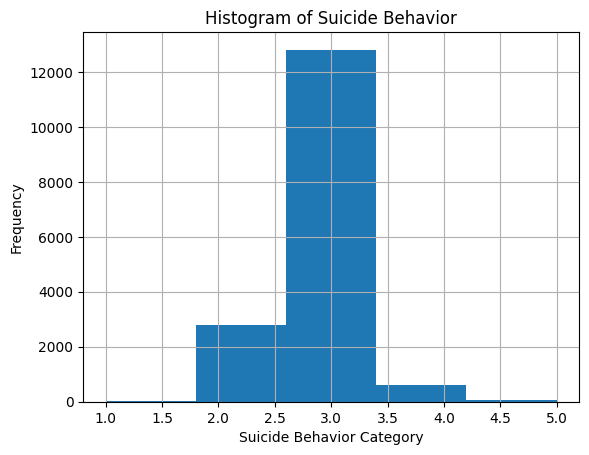

In [152]:
df['suicide_behavior'].hist(bins=5)
plt.xlabel('Suicide Behavior Category')
plt.ylabel('Frequency')
plt.title('Histogram of Suicide Behavior')
plt.show()

In [151]:
df.to_csv('processed_data.csv', index=False)